## SVM 

#### SVM종류
1) 선형 : Linear SVM(직선) : 매개변수 c

2) 비선형 RBF SVM : 매개변수 c , gamma(r)

*c(=cost) : 손실률, 얼마정도의 손실률 허용할지. 

-c값이 작을수록 많이 허용. 클수록 적게 허용. 

-너무 작으면 underfitting, 너무 크면 overfitting을 초래한다.

*gamma(r) : 하나의 데이터가 영향력을 행사하는 거리를 결정. 행사하는 거리 => 표준편차를 의미

-gamma값이 클수록, 작은 표준편차를 갖는다.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
#from matplotlib.colors as 

In [41]:
train=pd.read_csv("mobile-price-classification/train.csv")
test=pd.read_csv("mobile-price-classification/test.csv")

In [42]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [43]:
train["price_range"].describe()
train["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

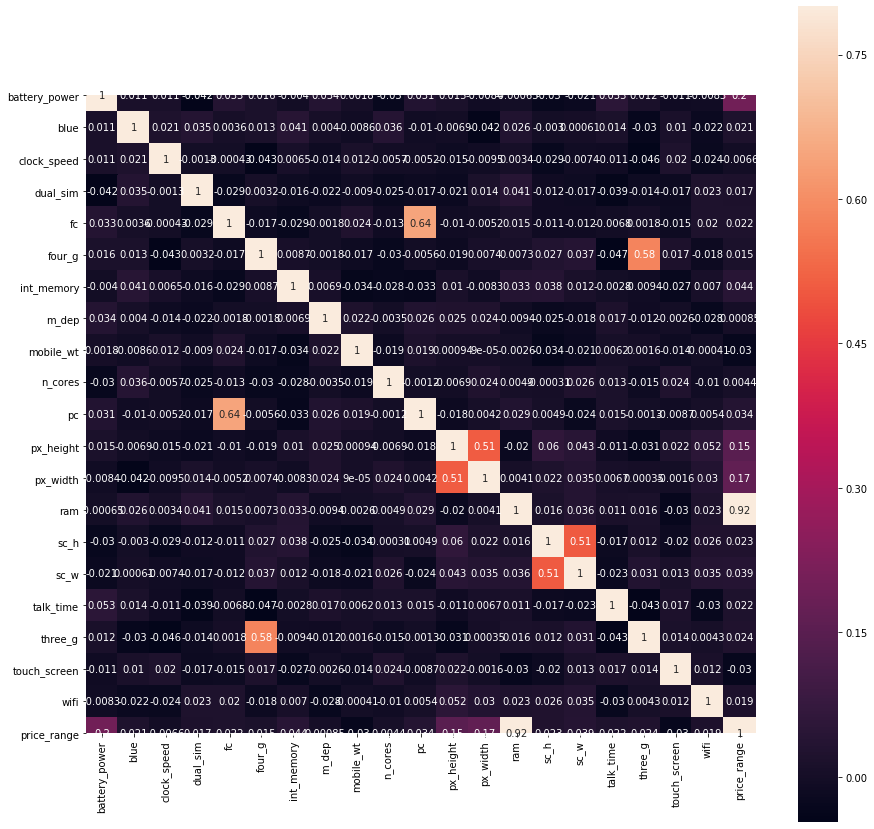

In [44]:
corrmat=train.corr()
plt.subplots(figsize=(15,15))
train_heatmap=sns.heatmap(corrmat, square=True, annot=True, vmax=0.8)

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #정규화

In [46]:
#price_range를 종속변수(분류하려는 변수값)

yt=np.array(train["price_range"])
xt=train.drop(["price_range"], axis=1)
xt=np.array(xt)

In [47]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [48]:
scaler=MinMaxScaler()

In [49]:
xt=scaler.fit_transform(xt)

In [52]:
xt.shape
yt.shape

(2000,)

In [58]:
#train/test 나누기

xtrain, xtest, ytrain, ytest=train_test_split(xt,yt, train_size=0.8, random_state=42)

In [61]:
ytest.shape

(400,)

In [63]:
#Linear SYM을 위한 C 값 tuning

for thisC in [1,3,5,10,40,60,80,100]:
    svc=SVC(kernel="linear", C=thisC)
    model=svc.fit(xtrain, ytrain)
    scoreTrain=model.score(xtrain, ytrain)
    scoreTest=model.score(xtest, ytest)
    print("선형 SVM : C:{}, training score;{:2f}, test score:{:2f}\n". format(thisC, scoreTrain, scoreTest))

선형 SVM : C:1, training score;0.953750, test score:0.960000

선형 SVM : C:3, training score;0.961875, test score:0.977500

선형 SVM : C:5, training score;0.968125, test score:0.975000

선형 SVM : C:10, training score;0.977500, test score:0.967500

선형 SVM : C:40, training score;0.981250, test score:0.962500

선형 SVM : C:60, training score;0.981250, test score:0.962500

선형 SVM : C:80, training score;0.981875, test score:0.970000

선형 SVM : C:100, training score;0.980625, test score:0.967500



### 모델 평가 (5Fold-Validation)

In [73]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel="linear",C=20).fit(xtrain,ytrain)
scores=cross_val_score(model, xtrain, ytrain, cv=5) 
print("CV_score :" +str(scores))
st_scores=cross_val_score(model,xtrain, ytrain, cv=StratifiedKFold(5, random_state=10, shuffle=True))

print("Stratified CV_score:" +str(st_scores))
print("CV_score 평균:" +str(scores.mean()))                          
print("Stratified CV_score 평균:" +str(st_scores.mean()))


CV_score :[0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
Stratified CV_score:[0.97819315 0.92834891 0.93457944 0.97805643 0.96226415]
CV_score 평균:0.9512591238085129
Stratified CV_score 평균:0.9562884145205576


In [74]:
for thisC in [1,3,5,10,40,60,80,100]:
    svc=LinearSVC(C=thisC)
    model2=svc.fit(xtrain, ytrain)
    scoreTrain=model2.score(xtrain, ytrain)
    scoreTest=model2.score(xtest, ytest)
    print("선형 SVM : C:{}, training score;{:2f}, test score:{:2f}\n". format(thisC, scoreTrain, scoreTest))
    
    #LinearSVC(속도 빠르다.) / SVC(커널 트릭 지원, 속도느림) 

NameError: name 'LinearSVC' is not defined

In [83]:
#RBF 커널 SVM의 최적의 C와 gamma파라미터 구하기

for thisGamma in [0.1, 0.25, 0.5, 1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel="rbf", C=thisC, gamma=thisGamma).fit(xtrain, ytrain)
        scoreTrain3=model3.score(xtrain,ytrain)
        scoreTrain3=model3.score(xtest, ytest)
        print("TBF SVM : C:{}, Gamma:{}, training score;{:2f}, test score:{:2f}\n". format(thisC, thisGamma, scoreTrain3, scoreTrain3))
        
        

TBF SVM : C:1, Gamma:0.1, training score;0.902500, test score:0.902500

TBF SVM : C:5, Gamma:0.1, training score;0.907500, test score:0.907500

TBF SVM : C:10, Gamma:0.1, training score;0.907500, test score:0.907500

TBF SVM : C:20, Gamma:0.1, training score;0.912500, test score:0.912500

TBF SVM : C:40, Gamma:0.1, training score;0.902500, test score:0.902500

TBF SVM : C:100, Gamma:0.1, training score;0.907500, test score:0.907500

TBF SVM : C:1, Gamma:0.25, training score;0.887500, test score:0.887500

TBF SVM : C:5, Gamma:0.25, training score;0.872500, test score:0.872500

TBF SVM : C:10, Gamma:0.25, training score;0.895000, test score:0.895000

TBF SVM : C:20, Gamma:0.25, training score;0.902500, test score:0.902500

TBF SVM : C:40, Gamma:0.25, training score;0.897500, test score:0.897500

TBF SVM : C:100, Gamma:0.25, training score;0.897500, test score:0.897500

TBF SVM : C:1, Gamma:0.5, training score;0.835000, test score:0.835000

TBF SVM : C:5, Gamma:0.5, training score;0.85000

### 최적의 파라미터를 구해주는 모듈 : GridSearch 

In [95]:
from sklearn.model_selection import GridSearchCV

param={"C":[1,5,10,20,40,100], "gamma":[0.1, 0.25, 0.5, 1]}
GS=GridSearchCV(SVC(kernel="rbf"), param, cv=5 )
GS.fit(xtrain, ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'C': 5, 'gamma': 0.1}
0.90375


In [86]:
test=test.drop(["id"], axis=1)

In [92]:
test=scaler.fit_transform(test)
test.shape

(1000, 20)

In [90]:
model=SVC(kernel="rbf", C=5, gamma=0.5).fit(xtrain, ytrain)

In [94]:
prediction=model.predict(test)
pred=pd.DataFrame(prediction)
print(pred)

     0
0    2
1    3
2    3
3    3
4    1
..  ..
995  1
996  1
997  1
998  2
999  2

[1000 rows x 1 columns]
